Here is what I want you to do:
(1) Import in python as pandas dataframe 
(2) There are some rows with missing data, remove all those rows 
(3) Find mean, median, mode etc of each columns 
(4) Make boxplots, scattermatrix plot etc of columns of your choice. However make sure it makes sense.
(5) Do a linear fit and display equations in the graph for columns of your choice.

Remember, I am letting you choose the columns.
You can do whatever you like but at the end you should explain why you chose those column 
and what the result means.
I forgot histograms, draw histogram plots as well. you choose columns!

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats
import seaborn as sns
sns.set()

## Reading Data 

In [2]:
data=pd.read_csv('Chamorro-Premuzic.txt',delimiter='\t',na_values=' ') #detect missing values as ' ' with na_values
data.info()
#Data has many missing entries

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 430 entries, 0 to 429
Data columns (total 12 columns):
Age         404 non-null float64
Gender      424 non-null object
studentN    420 non-null float64
studentE    418 non-null float64
studentO    418 non-null float64
studentA    413 non-null float64
studentC    416 non-null float64
lectureN    417 non-null float64
lecturE     283 non-null float64
lecturO     420 non-null float64
lecturA     417 non-null float64
lecturC     417 non-null float64
dtypes: float64(11), object(1)
memory usage: 40.4+ KB


## Filter out NA values

In [3]:
# Drop all rows with any cells having NA values
data=data.dropna(axis=0, how='any')

In [4]:
data.info()
#Now we have 265 non-null entries each in all columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 265 entries, 140 to 429
Data columns (total 12 columns):
Age         265 non-null float64
Gender      265 non-null object
studentN    265 non-null float64
studentE    265 non-null float64
studentO    265 non-null float64
studentA    265 non-null float64
studentC    265 non-null float64
lectureN    265 non-null float64
lecturE     265 non-null float64
lecturO     265 non-null float64
lecturA     265 non-null float64
lecturC     265 non-null float64
dtypes: float64(11), object(1)
memory usage: 26.9+ KB


In [5]:
# Original data has float entries for numerical columns, if we need int entries:

#Uncomment the block
#col_names = data.columns
#types_dict = {'Gender': str}
#types_dict.update({col: int for col in col_names if col not in types_dict})
#data=data.astype(types_dict)
#data.info()

#Another method:
#data.loc[:, data.columns != 'Gender']= data.loc[:, data.columns != 'Gender'].astype('int')
#data.info()

## DataSet Survey

In [6]:
print("The dimensions of the dataset are:",data.shape)
print("The index of the dataset is:",data.index)

The dimensions of the dataset are: (265, 12)
The index of the dataset is: Int64Index([140, 141, 142, 143, 144, 145, 146, 147, 148, 149,
            ...
            419, 420, 421, 423, 424, 425, 426, 427, 428, 429],
           dtype='int64', length=265)


In [7]:
print("The columns of the dataset are:",data.columns)

The columns of the dataset are: Index(['Age', 'Gender', 'studentN', 'studentE', 'studentO', 'studentA',
       'studentC', 'lectureN', 'lecturE', 'lecturO', 'lecturA', 'lecturC'],
      dtype='object')


In [8]:
print("Head of dataset")
data.head(5)

Head of dataset


,Age,Gender,studentN,studentE,studentO,studentA,studentC,lectureN,lecturE,lecturO,lecturA,lecturC
140,18.0,Female,28.0,19.0,21.0,48.0,35.0,-29.0,16.0,-7.0,10.0,23.0
141,19.0,Female,20.0,28.0,32.0,46.0,28.0,-10.0,21.0,17.0,26.0,25.0
142,18.0,Female,34.0,22.0,28.0,25.0,7.0,-6.0,3.0,-1.0,1.0,10.0
143,24.0,Female,20.0,32.0,32.0,44.0,27.0,-18.0,8.0,6.0,5.0,18.0
144,18.0,Female,29.0,17.0,31.0,52.0,27.0,-25.0,20.0,8.0,-2.0,20.0


In [9]:
print("Tail of dataset")
data.tail(5)

Tail of dataset


,Age,Gender,studentN,studentE,studentO,studentA,studentC,lectureN,lecturE,lecturO,lecturA,lecturC
425,20.0,Male,23.0,31.0,21.0,51.0,29.0,-25.0,19.0,17.0,18.0,24.0
426,22.0,Female,24.0,26.0,23.0,59.0,24.0,0.0,13.0,8.0,12.0,22.0
427,19.0,Male,18.0,21.0,36.0,44.0,26.0,-12.0,11.0,1.0,7.0,8.0
428,22.0,Male,40.0,32.0,29.0,73.0,24.0,-18.0,26.0,16.0,19.0,27.0
429,19.0,Female,10.0,37.0,43.0,62.0,39.0,-23.0,16.0,20.0,-4.0,22.0


In [10]:
# Renaming the Columns
data.columns=['Age', 'Gender', 'stdNeuro', 'stdExtra', 'stdOpen', 'stdAgree',
       'stdConsc', 'lecNeuro', 'lecExtra', 'lecOpen', 'lecAgree', 'lecConsc']

## Descriptive statistics of columns

In [11]:
data.describe()

,Age,stdNeuro,stdExtra,stdOpen,stdAgree,stdConsc,lecNeuro,lecExtra,lecOpen,lecAgree,lecConsc
count,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.000000,265.00000,265.000000,265.000000,265.000000
mean,20.237736,23.713208,29.547170,28.969811,45.716981,29.618868,-21.558491,12.90566,8.018868,7.630189,16.879245
std,3.783949,8.640155,6.640002,6.164954,7.635090,6.888315,9.612441,6.73037,8.034232,9.523448,7.676740
min,2.000000,0.000000,5.000000,14.000000,25.000000,7.000000,-30.000000,-5.00000,-15.000000,-19.000000,-8.000000
25%,18.000000,19.000000,26.000000,24.000000,41.000000,25.000000,-29.000000,8.00000,3.000000,1.000000,12.000000
50%,19.000000,24.000000,30.000000,29.000000,46.000000,30.000000,-24.000000,13.00000,8.000000,7.000000,17.000000
75%,20.000000,29.000000,34.000000,33.000000,51.000000,35.000000,-18.000000,17.00000,14.000000,14.000000,23.000000
max,43.000000,44.000000,46.000000,44.000000,73.000000,45.000000,25.000000,28.00000,30.000000,29.000000,30.000000


In [12]:
# we see an unreasonable outlier in age
data[data['Age']<10]

,Age,Gender,stdNeuro,stdExtra,stdOpen,stdAgree,stdConsc,lecNeuro,lecExtra,lecOpen,lecAgree,lecConsc
251,2.0,Female,21.0,25.0,29.0,43.0,29.0,-27.0,14.0,14.0,2.0,12.0


In [13]:
#Removing the outlier
data=data[data['Age']>=10]
#Summarizing the data again
data.describe()

,Age,stdNeuro,stdExtra,stdOpen,stdAgree,stdConsc,lecNeuro,lecExtra,lecOpen,lecAgree,lecConsc
count,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000,264.000000
mean,20.306818,23.723485,29.564394,28.969697,45.727273,29.621212,-21.537879,12.901515,7.996212,7.651515,16.897727
std,3.619837,8.654943,6.646679,6.176663,7.647750,6.901292,9.624830,6.742815,8.041006,9.535194,7.685411
min,17.000000,0.000000,5.000000,14.000000,25.000000,7.000000,-30.000000,-5.000000,-15.000000,-19.000000,-8.000000
25%,18.000000,19.000000,26.000000,24.000000,41.000000,25.000000,-29.000000,8.000000,3.000000,1.000000,12.000000
50%,19.000000,24.000000,30.000000,29.000000,46.000000,30.000000,-24.000000,13.000000,7.500000,7.000000,17.000000
75%,20.000000,29.000000,34.000000,33.000000,51.000000,35.000000,-18.000000,17.250000,13.250000,14.250000,23.000000
max,43.000000,44.000000,46.000000,44.000000,73.000000,45.000000,25.000000,28.000000,30.000000,29.000000,30.000000


In [14]:
# Mode of columns
print("Modes of columns")
data.mode(numeric_only=False).loc[0,:]   
#set numeric_only=True to obtain modes of only numerical columns

Modes of columns


Age             19
Gender      Female
stdNeuro        24
stdExtra        33
stdOpen         28
stdAgree        47
stdConsc        31
lecNeuro       -30
lecExtra        10
lecOpen          8
lecAgree         4
lecConsc        16
Name: 0, dtype: object

In [15]:
'''normalized_data=data.copy(deep=True)
for col in data.columns:
    if normalized_data.dtypes[col]==float and col!='Age':
        normalized_data[col]=(data[col]-data[col].mean())/data[col].std()
normalized_data.head(5)'''

"normalized_data=data.copy(deep=True)\nfor col in data.columns:\n    if normalized_data.dtypes[col]==float and col!='Age':\n        normalized_data[col]=(data[col]-data[col].mean())/data[col].std()\nnormalized_data.head(5)"

##  Graphical Exploration

#### Age Distribution of Participants

Text(0, 0.5, 'Frequency')

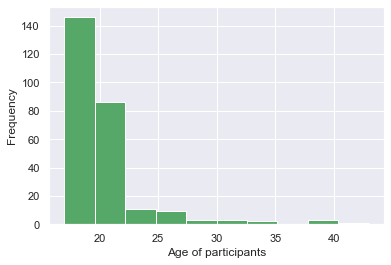

In [16]:
data['Age'].hist(color='g')
plt.xlabel('Age of participants')
plt.ylabel('Frequency')

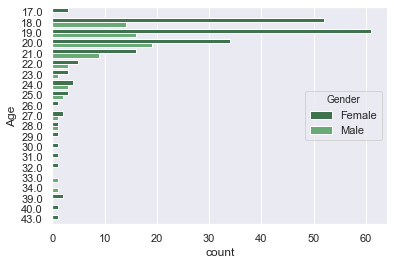

In [17]:
#Age breakdown by Gender
sns.countplot(y="Age", hue="Gender", data=data, palette="Greens_d")

### Boxplot

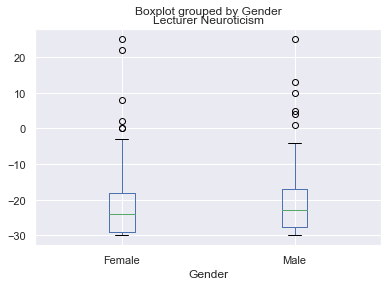

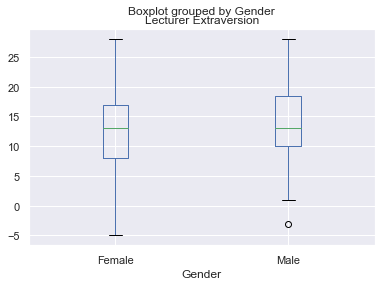

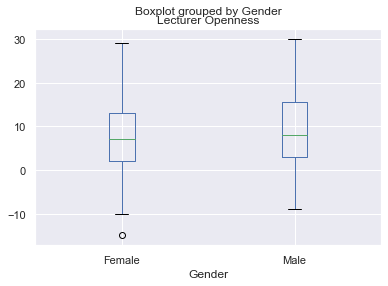

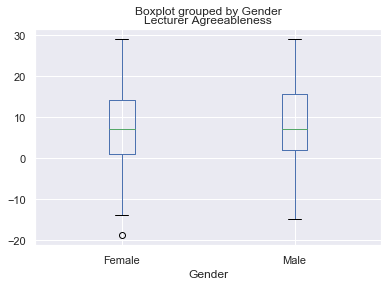

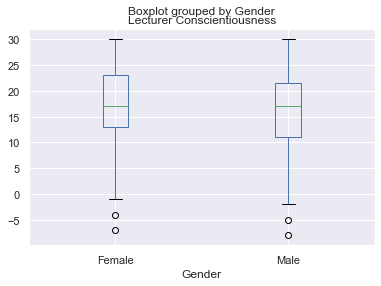

In [18]:
#Boxplot of students' preference of five personality traits among lecturers, grouped by gender
full=['Lecturer Neuroticism','Lecturer Extraversion','Lecturer Openness',\
      'Lecturer Agreeableness','Lecturer Conscientiousness']
j=0
for i in ['lecNeuro', 'lecExtra', 'lecOpen', 'lecAgree', 'lecConsc']:
    data.boxplot(column=i,by='Gender')
    plt.title(full[j])
    j=j+1
    #plt.suptitle("")

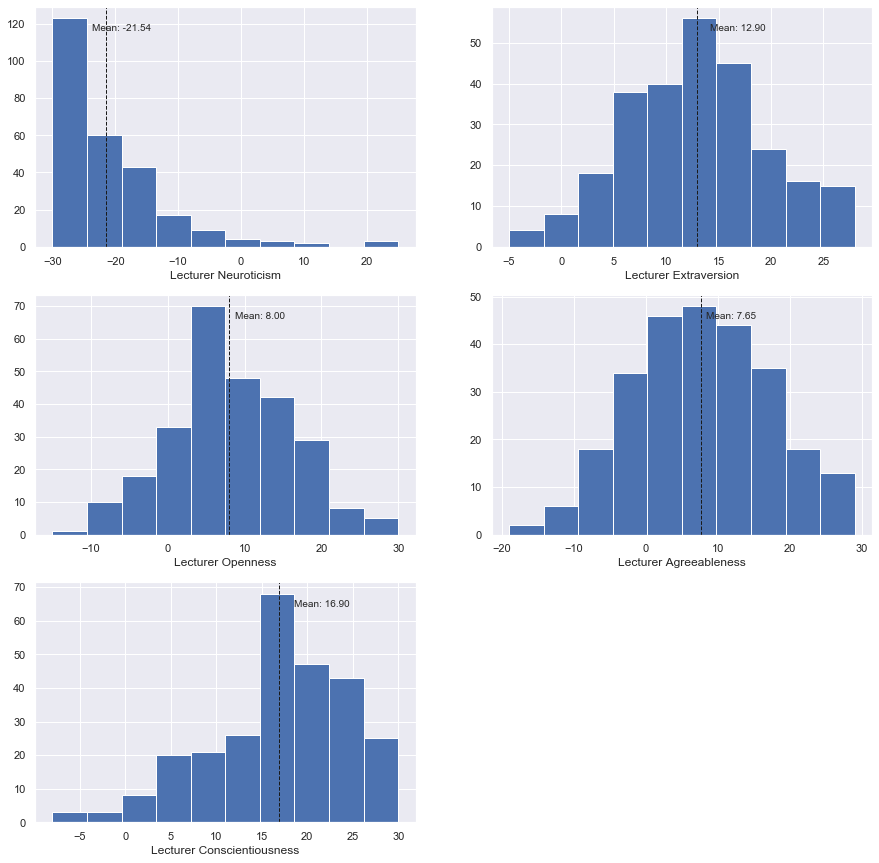

In [19]:
#Histograms of lecturer trait preferences of student participants

plt.figure(figsize = [15,15])
plt.subplot(3,2,1)
plt.xlabel('Lecturer Neuroticism')
data['lecNeuro'].hist()
min_ylim, max_ylim = plt.ylim()
plt.axvline(data['lecNeuro'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.text(data['lecNeuro'].mean()*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(data['lecNeuro'].mean()))
plt.subplot(3,2,2)
plt.xlabel('Lecturer Extraversion')
data['lecExtra'].hist()
min_ylim, max_ylim = plt.ylim()
plt.axvline(data['lecExtra'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.text(data['lecExtra'].mean()*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(data['lecExtra'].mean()))
plt.subplot(3,2,3)
plt.xlabel('Lecturer Openness')
data['lecOpen'].hist()
min_ylim, max_ylim = plt.ylim()
plt.axvline(data['lecOpen'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.text(data['lecOpen'].mean()*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(data['lecOpen'].mean()))
plt.subplot(3,2,4)
plt.xlabel('Lecturer Agreeableness')
data['lecAgree'].hist()
min_ylim, max_ylim = plt.ylim()
plt.axvline(data['lecAgree'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.text(data['lecAgree'].mean()*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(data['lecAgree'].mean()))
plt.subplot(3,2,5)
plt.xlabel('Lecturer Conscientiousness')
data['lecConsc'].hist()
min_ylim, max_ylim = plt.ylim()
plt.axvline(data['lecConsc'].mean(), color='k', linestyle='dashed', linewidth=1)
plt.text(data['lecConsc'].mean()*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(data['lecConsc'].mean()))

plt.show()

Students gave higher positive scores to Lecturer Conscientiousness than other traits followed by Extraversion and Openness. Agreeableness also recieved positive scores. Students seem to prefer conscientitious, extroverted, open and agreeable teachers(in that order). Neuroticism is however not appreciated and recieved high negative scores.

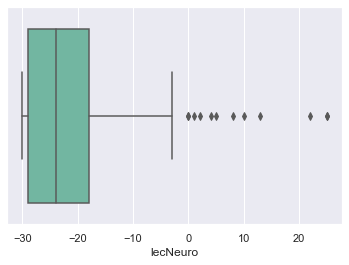

In [19]:
#Boxplot of Participants' preference about Lecturer neuroticism
ax = sns.boxplot(data['lecNeuro'], orient="h",palette="Set2")

There was strong dislike for Neurotic teachers among students. More negative scores denote less preference.

In [ ]:
#PairGrid

#g = sns.PairGrid(data, diag_sharey=False)
#g.map_upper(sns.scatterplot)
#g.map_lower(sns.kdeplot)
#g.map_diag(sns.kdeplot, lw=2)

## Linear Fits

### Student Neuroticism vs Lecturer Agreeableness

Text(0, 0.5, 'Lecturer Agreeableness')

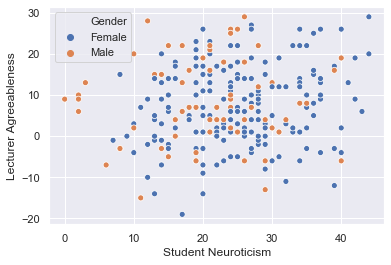

In [20]:
#Scatterplot
sns.scatterplot(x=data['stdNeuro'],y=data['lecAgree'],hue=data['Gender'])
# Set x-axis label
plt.xlabel('Student Neuroticism')
# Set y-axis label
plt.ylabel('Lecturer Agreeableness')

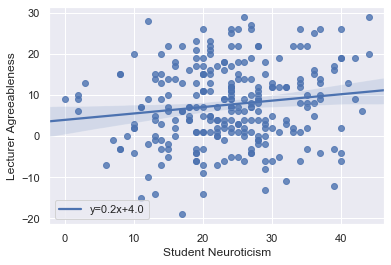

In [21]:
# Linear Fit with equations

#Getting coefficients of linear fit
slope, intercept, r_value, p_value, std_err = stats.linregress(data['stdNeuro'],data['lecAgree'])

#Using line_kws to set line label for legend
ax = sns.regplot(x=data['stdNeuro'], y=data['lecAgree'], color='b', 
 line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})

#Plotting legend
ax.legend()
ax.set(xlabel='Student Neuroticism',ylabel='Lecturer Agreeableness')
plt.show()

In [22]:
r_value,p_value,std_err

(0.1415633944421507, 0.02140195899394187, 0.067378105667982)

There was significant positive correlation between student Neuroticism and lecture Agreeableness. The strength of the correlation was however weak with correlation coefficient r=0.14. But we can conclude neurotic ~ Anxious students seem to prefer agreeable ~ altruistic and warm teachers.

### Student Extraversion vs Lecturer Extraversion

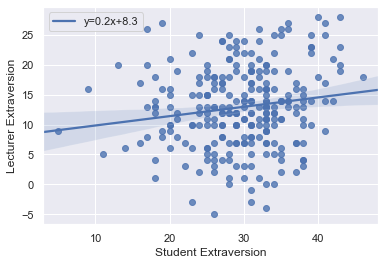

In [23]:
# Linear Fit with equations

#Getting coefficients of linear fit
slope, intercept, r_value, p_value, std_err = stats.linregress(data['stdExtra'],data['lecExtra'])

#Using line_kws to set line label for legend
ax = sns.regplot(x='stdExtra', y='lecExtra',data=data, color='b', 
 line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})

ax.set(xlabel='Student Extraversion',ylabel='Lecturer Extraversion')
#Plotting legend
ax.legend()

plt.show()

In [24]:
r_value, p_value, std_err

(0.15395612608758136, 0.012260009855566328, 0.061926556833940674)

Student Extraversion was significantly correlated with preference for lecturer Extraversion. The correlation was positive with r = 0.15. Extraverted students prefer extraverted lecturers.

### Student Extraversion and Lecturer Neuroticism

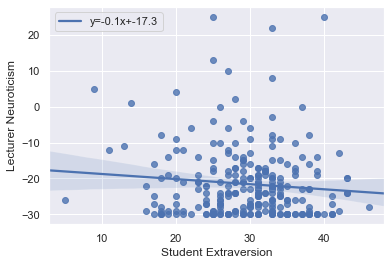

In [25]:
# Getting coefficients of linear fit
slope, intercept, r_value, p_value, std_err = stats.linregress(x=data['stdExtra'], y=data['lecNeuro'])
#Using line_kws to set line label for legend
ax = sns.regplot(x='stdExtra', y='lecNeuro',data=data, color='b', 
 line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})

#Plotting legend
ax.legend()
ax.set(xlabel='Student Extraversion',ylabel='Lecturer Neuroticism')
plt.show()


In [26]:
r_value,p_value,std_err

(-0.09817901613016959, 0.11149759549309779, 0.08902959676819305)

Students' Extraversion correlated negatively with their preference for lecturer Neuroticism. But not significantly (p =0.111 > 0.05)

### Student Openness vs Lecturer Openness

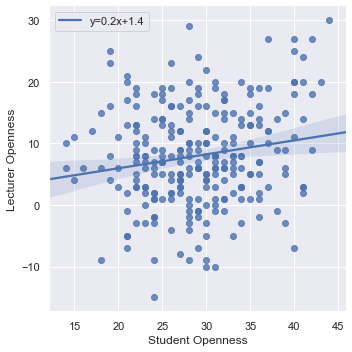

In [27]:
# Getting coefficients of linear fit
slope, intercept, r_value, p_value, std_err = stats.linregress(x=data['stdOpen'], y=data['lecOpen'])
#Plotting the line
sns.lmplot(x='stdOpen',y='lecOpen',data=data,\
           line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})
#Plotting legend
plt.legend()
plt.xlabel("Student Openness")
plt.ylabel("Lecturer Openness")
plt.show()


In [28]:
r_value,p_value,std_err

(0.17378007803126075, 0.004629093591041969, 0.07920398275272769)

There was significant positive correlation(r=0.17) between Student openness and their preference for Lecturer openness. Students open to novel intellectual experiences prefer lecturers who resemble them in that regard.

### Student Conscientiousness v Lecturer Conscientiousness

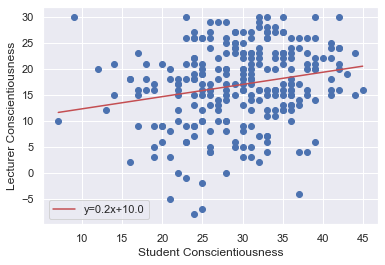

In [29]:
#Using Matplotlib 

x=data['stdConsc']
y=data['lecConsc']
gradient, intercept, r_value, p_value, std_err = stats.linregress(x,y)
mn=np.min(x)
mx=np.max(x)
x1=np.linspace(mn,mx,500)
y1=gradient*x1+intercept
plt.plot(x,y,'ob')
plt.plot(x1,y1,'-r',label='y={0:.1f}x+{1:.1f}'.format(gradient,intercept))
plt.xlabel("Student Conscientiousness")
plt.ylabel("Lecturer Conscientiousness")
plt.legend()
plt.show()

In [30]:
r_value, p_value, std_err

(0.21010135354147785, 0.0005904264788927835, 0.06726398509619766)

There is positive correlation ( r = 0.21 ) between Student Conscientiousness and preference for Lecturer Conscientiousness. The correlation is significant and students who are conscientious( organized and methodical) seem to prefer organized and methodical lecturers.

### Student Agreeableness vs Lecturer Agreeableness

Text(0, 0.5, 'Lecturer Agreeableness')

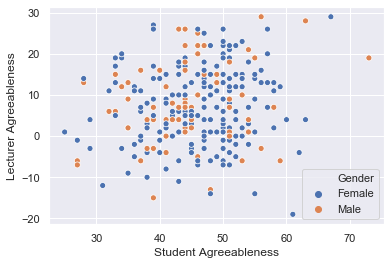

In [31]:
sns.scatterplot(x=data['stdAgree'],y=data['lecAgree'],hue=data['Gender'])
plt.xlabel('Student Agreeableness')
plt.ylabel('Lecturer Agreeableness')

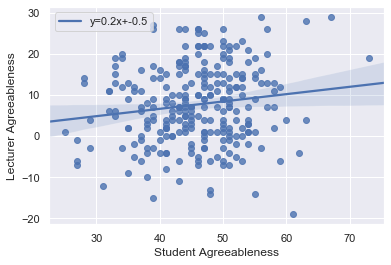

In [32]:
# Linear Fit with equations

#Getting coefficients of linear fit
slope, intercept, r_value, p_value, std_err = stats.linregress(data['stdAgree'],data['lecAgree'])

#Using line_kws to set line label for legend
ax = sns.regplot(x='stdAgree', y='lecAgree',data=data, color='b', 
 line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})

ax.set(xlabel='Student Agreeableness',ylabel='Lecturer Agreeableness')
#Plotting legend
ax.legend()

plt.show()

In [33]:
stats.linregress(data['stdAgree'],data['lecAgree'])

LinregressResult(slope=0.17851021831377134, intercept=-0.5112702859236657, rvalue=0.14317500843433936, pvalue=0.01995024010821064, stderr=0.07623381283219734)

There is significant positive correlation (r=0.143) between Student Agreeableness and Lecturer Agreeableness.

### Age vs Lecturer Agreeableness

Text(0, 0.5, 'Lecturer Agreeableness')

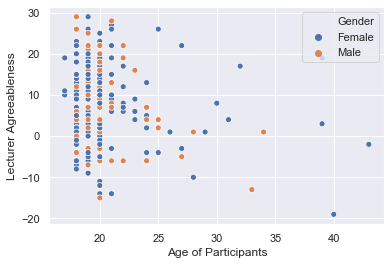

In [34]:
sns.scatterplot(x=data['Age'],y=data['lecAgree'],hue=data['Gender'])
plt.xlabel('Age of Participants')
plt.ylabel('Lecturer Agreeableness')

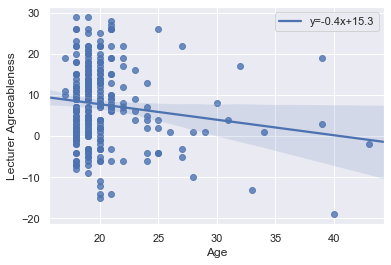

In [35]:
# Linear Fit with equations

#Getting coefficients of linear fit
slope, intercept, r_value, p_value, std_err = stats.linregress(x=data['Age'],y=data['lecAgree'])

#Using line_kws to set line label for legend
ax = sns.regplot(x='Age',y='lecAgree',data=data, color='b', 
 line_kws={'label':"y={0:.1f}x+{1:.1f}".format(slope,intercept)})

ax.set(xlabel='Age',ylabel='Lecturer Agreeableness')
#Plotting legend
ax.legend()

plt.show()

In [36]:
stats.linregress(x=data['Age'],y=data['lecAgree'])
print("correlation coefficient is ", r_value)
print("p value is ",p_value)

correlation coefficient is  -0.14307337251651328
p value is  0.020039199629459548


There is significant negative correlation between age of participants and their preference for agreeable lecturers. Younger students preferred more agreeable teachers.

### Correlation matrix between columns of dataset

In [37]:
correMatrix=data.corr()
print(correMatrix)

               Age  stdNeuro  stdExtra   stdOpen  stdAgree  stdConsc  \
Age       1.000000 -0.022040  0.036709 -0.009786  0.052067  0.091883   
stdNeuro -0.022040  1.000000 -0.393390 -0.057698  0.042169 -0.229081   
stdExtra  0.036709 -0.393390  1.000000  0.116744  0.044853  0.151479   
stdOpen  -0.009786 -0.057698  0.116744  1.000000 -0.076885 -0.104455   
stdAgree  0.052067  0.042169  0.044853 -0.076885  1.000000  0.518172   
stdConsc  0.091883 -0.229081  0.151479 -0.104455  0.518172  1.000000   
lecNeuro  0.148158  0.011216 -0.098179 -0.061228  0.025325 -0.146186   
lecExtra  0.055766 -0.087123  0.153956  0.067395  0.078741  0.111464   
lecOpen   0.067054 -0.039899  0.055247  0.173780  0.073623 -0.021952   
lecAgree -0.143073  0.141563 -0.049080 -0.190760  0.143175  0.098930   
lecConsc  0.048968  0.051420 -0.010850 -0.082166  0.223613  0.210101   

          lecNeuro  lecExtra   lecOpen  lecAgree  lecConsc  
Age       0.148158  0.055766  0.067054 -0.143073  0.048968  
stdNeuro  0.0

Text(0.5, 1, 'Correlation matrix')

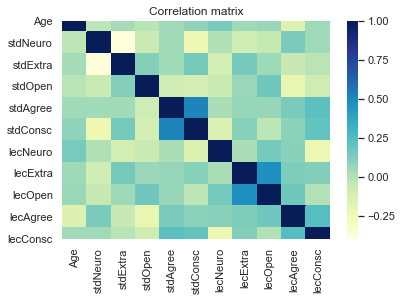

In [38]:
#Heatmap of correlations
ax=plt.axes()
sns.heatmap(correMatrix,cmap='YlGnBu',ax=ax)
ax.set_title("Correlation matrix")

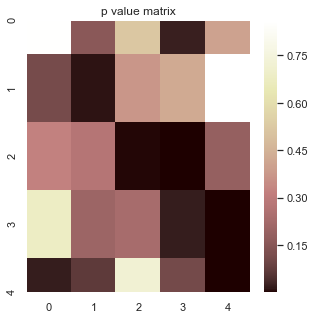

In [39]:
# Student attributes
std=['stdNeuro', 'stdExtra', 'stdOpen', 'stdAgree','stdConsc']
# Lecturer attributes
lec=['lecNeuro', 'lecExtra', 'lecOpen', 'lecAgree', 'lecConsc']

# P-Matrix to hold p-values
P =[[0 for i in enumerate(std)] for j in enumerate(lec)]

for i in np.arange(0,5,1):
    for j in np.arange(0,5,1):
        slope, intercept, r_value, p_value, std_err=stats.linregress(x=data[std[i]],y=data[lec[j]])
        #if p_value<0.05:
        P[i][j]=p_value

plt.figure(figsize=[5,5]) 
ax=plt.axes()
ax.set_title("p value matrix")
sns.heatmap(P,cmap='pink') 


In [40]:
# Columns with significant correlations
print("p_value \t \t","std Col \t ","lec Col \t","correlation coefficient r")
for i in np.arange(0,5,1):
    for j in np.arange(0,5,1):
        slope, intercept, r_value, p_value, std_err=stats.linregress(x=data[std[i]],y=data[lec[j]])
        if p_value<0.05:
            print(p_value,'\t',std[i],'\t',lec[j],'\t',r_value)
            

p_value 	 	 std Col 	  lec Col 	 correlation coefficient r
0.02140195899394187 	 stdNeuro 	 lecAgree 	 0.1415633944421507
0.012260009855566328 	 stdExtra 	 lecExtra 	 0.15395612608758136
0.004629093591041969 	 stdOpen 	 lecOpen 	 0.17378007803126075
0.0018493672291727229 	 stdOpen 	 lecAgree 	 -0.19075990882508342
0.01995024010821064 	 stdAgree 	 lecAgree 	 0.14317500843433936
0.0002497396959740757 	 stdAgree 	 lecConsc 	 0.22361306338028283
0.017465851702377223 	 stdConsc 	 lecNeuro 	 -0.1461859374001321
0.0005904264788927835 	 stdConsc 	 lecConsc 	 0.21010135354147785


Conclusion: There was significant correlation in four out of five(all except Neuroticism) personality characteristics studied between student traits and their preference for corresponding traits in lecturers.

Their hypothesis that students prefer lecturers similar to themselves is supported by the data given.